In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

## Load and clean emissions and electricity generation data 

In [63]:
# Load emissions dataset
e_data = pd.read_csv("Data/state_emissions.csv", thousands=",")
e_data.rename(
    columns={
        "Year": "year",
        "State": "state",
        "Producer Type": "producer",
        "Energy Source": "source",
        "CO2\n(Metric Tons)": "co2",
        "SO2\n(Metric Tons)": "so2",
        "NOx\n(Metric Tons)": "nox",
    },
    inplace=True,
)

# Change all strings to uppercase
e_data["state"] = e_data["state"].str.upper()
e_data["producer"] = e_data["producer"].str.upper()
e_data["source"] = e_data["source"].str.upper()

# Filter for total emissions
e_data = e_data[e_data["producer"] == "TOTAL ELECTRIC POWER INDUSTRY"]
e_data = e_data[e_data["source"] == "ALL SOURCES"]

# Load generation dataset
g_data = pd.read_csv("Data/annual_generation_state.csv", thousands=",")
g_data.rename(
    columns={
        "YEAR": "year",
        "STATE": "state",
        "TYPE OF PRODUCER": "producer",
        "ENERGY SOURCE": "source",
        "GENERATION (Megawatthours)": "generation",
    },
    inplace=True,
)

# Change all strings to upper for consistency (state column has 'US-Total' and 'US-TOTAL')
g_data["state"] = g_data["state"].str.upper()
g_data["producer"] = g_data["producer"].str.upper()
g_data["source"] = g_data["source"].str.upper()

# Only keep the information on total electricity generationn for each state
g_data = g_data[g_data["producer"] == "TOTAL ELECTRIC POWER INDUSTRY"]
g_data.reset_index(drop=True, inplace=True)

# Only keep the information on total electricity generationn for each state
g_data = g_data[g_data["source"] == "TOTAL"]

# Merge the two datasets
e_data.drop(["producer", "source"], axis=1, inplace=True)
g_data.drop(["producer", "source"], axis=1, inplace=True)
data = pd.merge(e_data, g_data, on=["year", "state"], how="inner")

# Create normalized emissions column
data["norm_emis"] = (data["co2"] + data["so2"] + data["nox"]) / data["generation"]

## Visualize Normalized Emissions

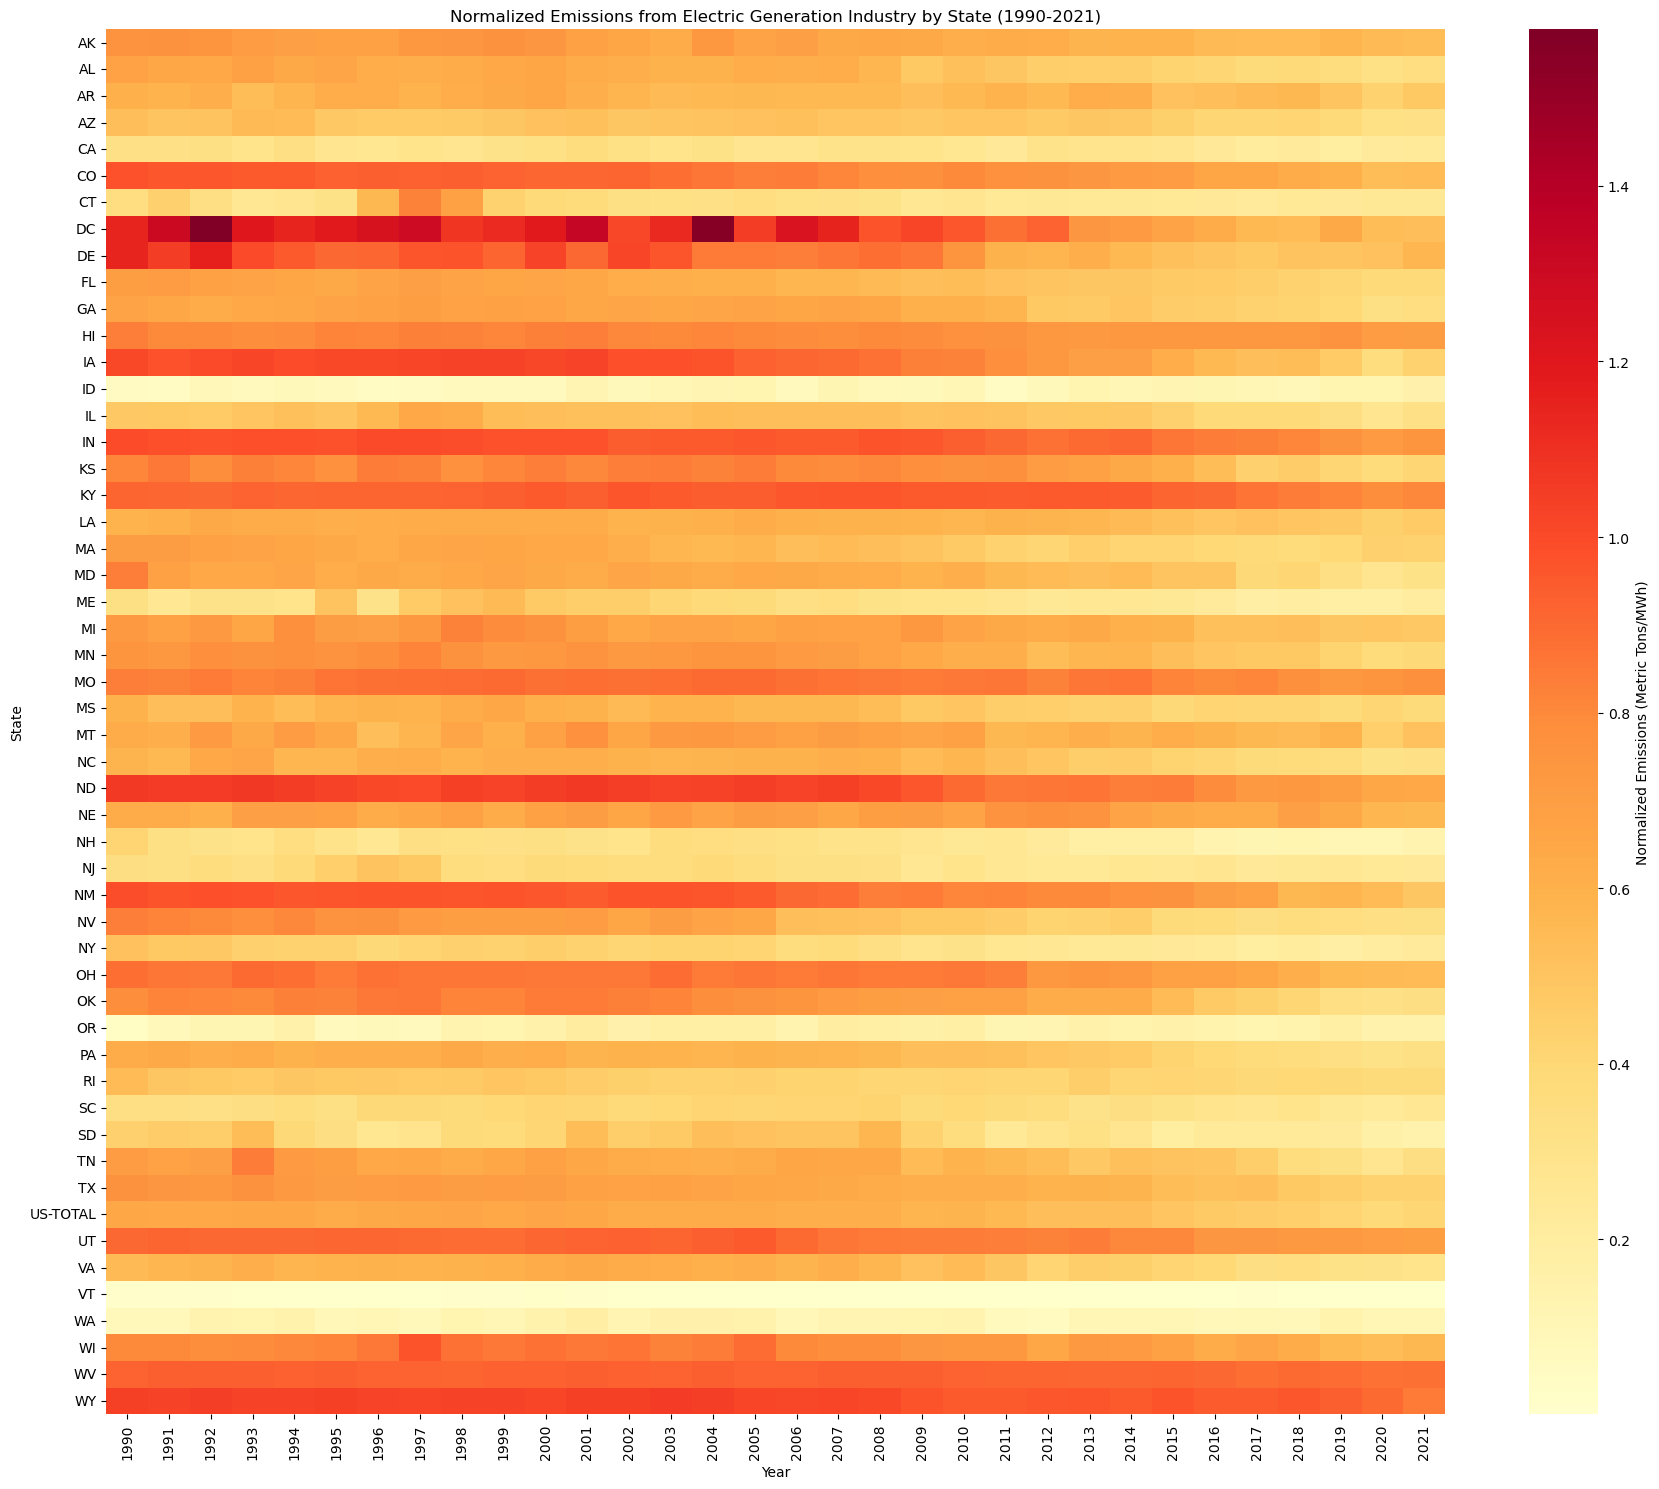

In [64]:
# Pivot data for heatmap
so2_heatmap = data.pivot(index="state", columns="year", values="norm_emis")

# Plotting
plt.figure(figsize=(18, 15))
sns.heatmap(so2_heatmap, cmap="YlOrRd", cbar_kws={'label': 'Normalized Emissions (Metric Tons/MWh)'})
plt.title("Normalized Emissions from Electric Generation Industry by State (1990-2021)")
plt.ylabel("State")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

## Visualize CO2 emissions

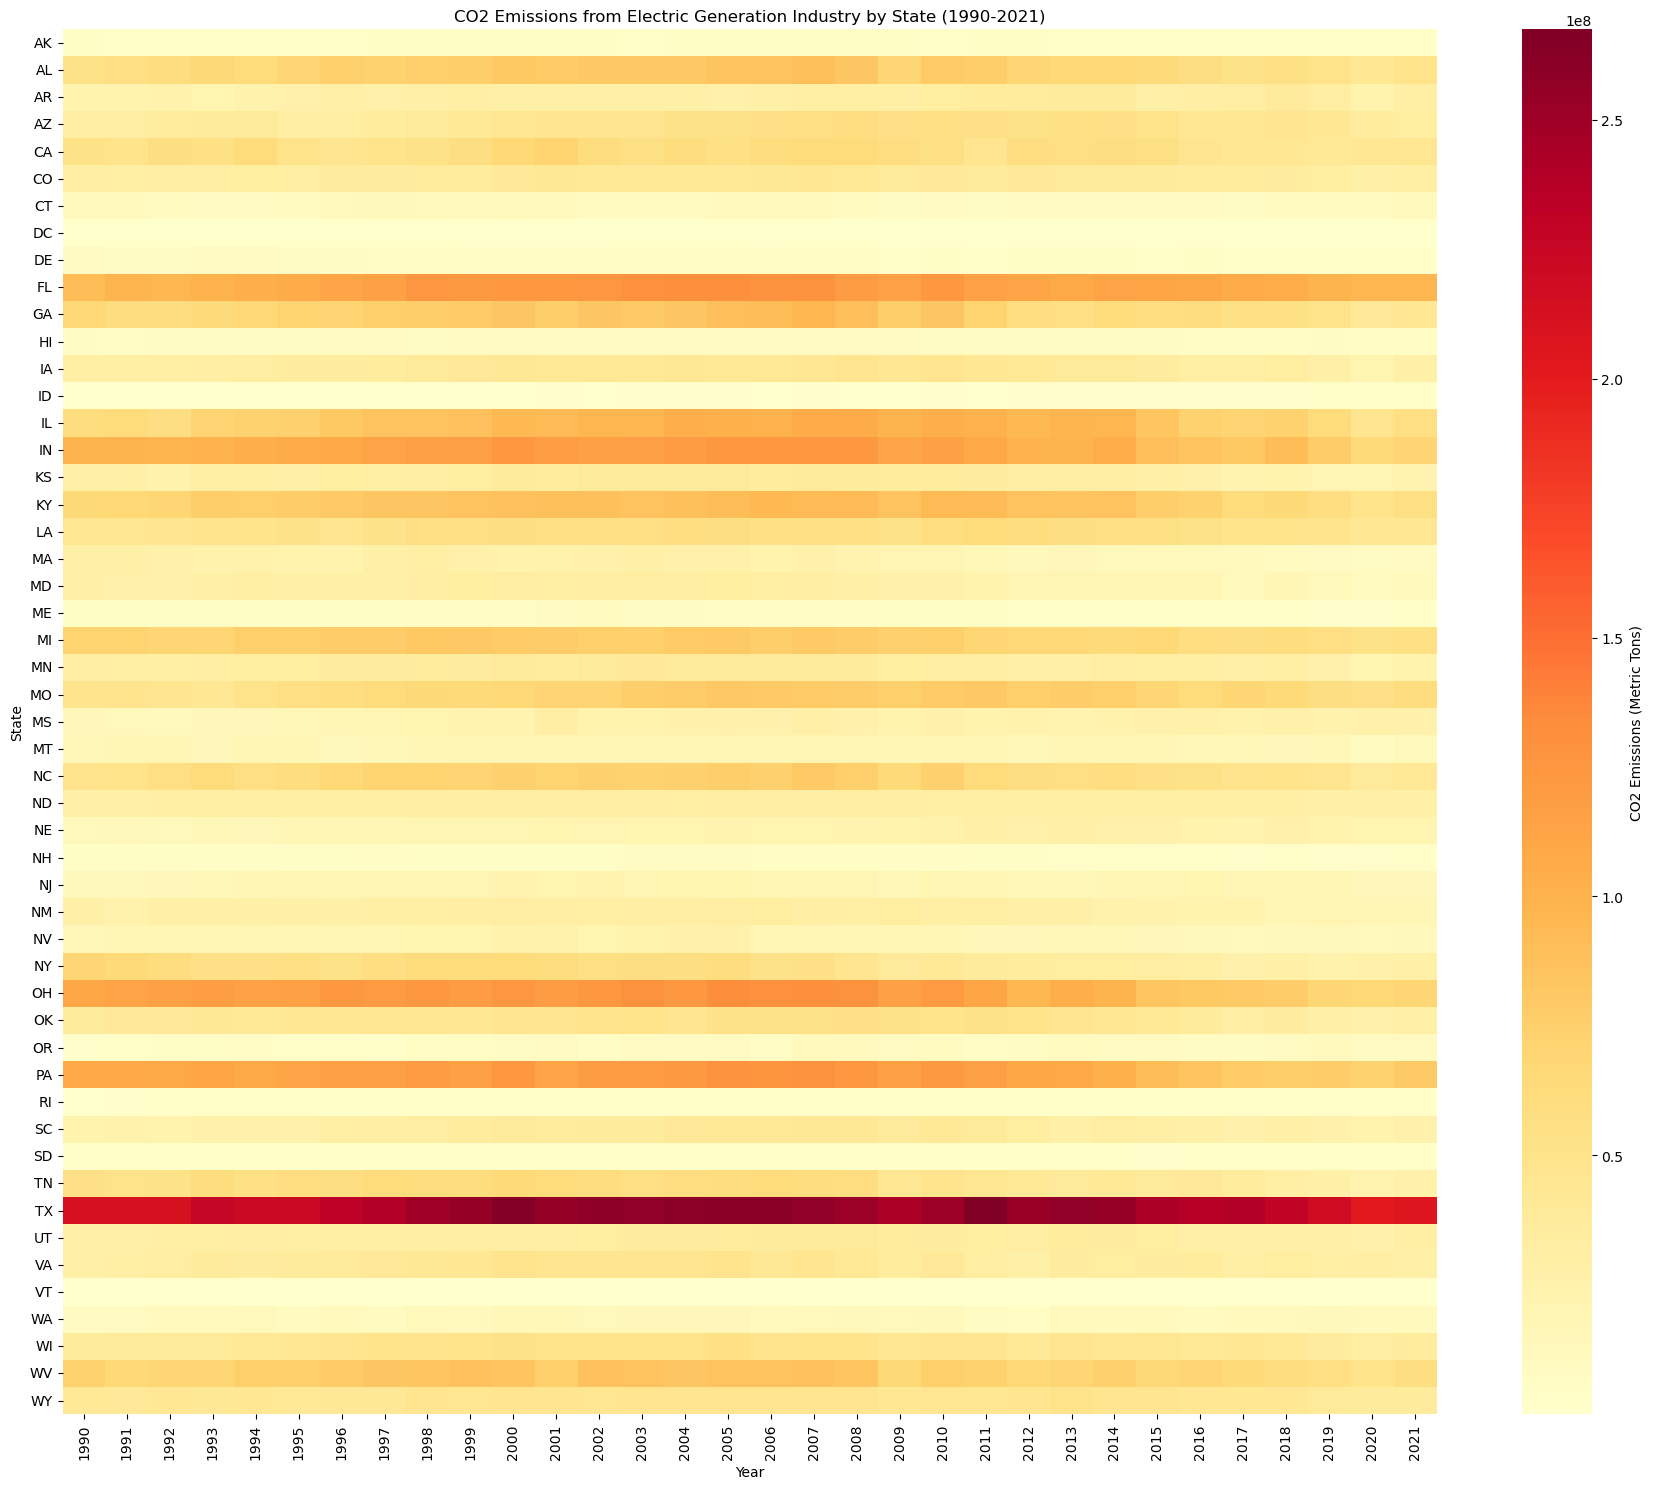

In [65]:
# Drop US-TOTAL 
data = data[data['state'] != "US-TOTAL"]

# Pivot data for heatmap
so2_heatmap = data.pivot(index="state", columns="year", values="co2")

# Plotting
plt.figure(figsize=(18, 15))
sns.heatmap(so2_heatmap, cmap="YlOrRd", cbar_kws={'label': 'CO2 Emissions (Metric Tons)'})
plt.title("CO2 Emissions from Electric Generation Industry by State (1990-2021)")
plt.ylabel("State")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


## Visualize SO2 Emissions

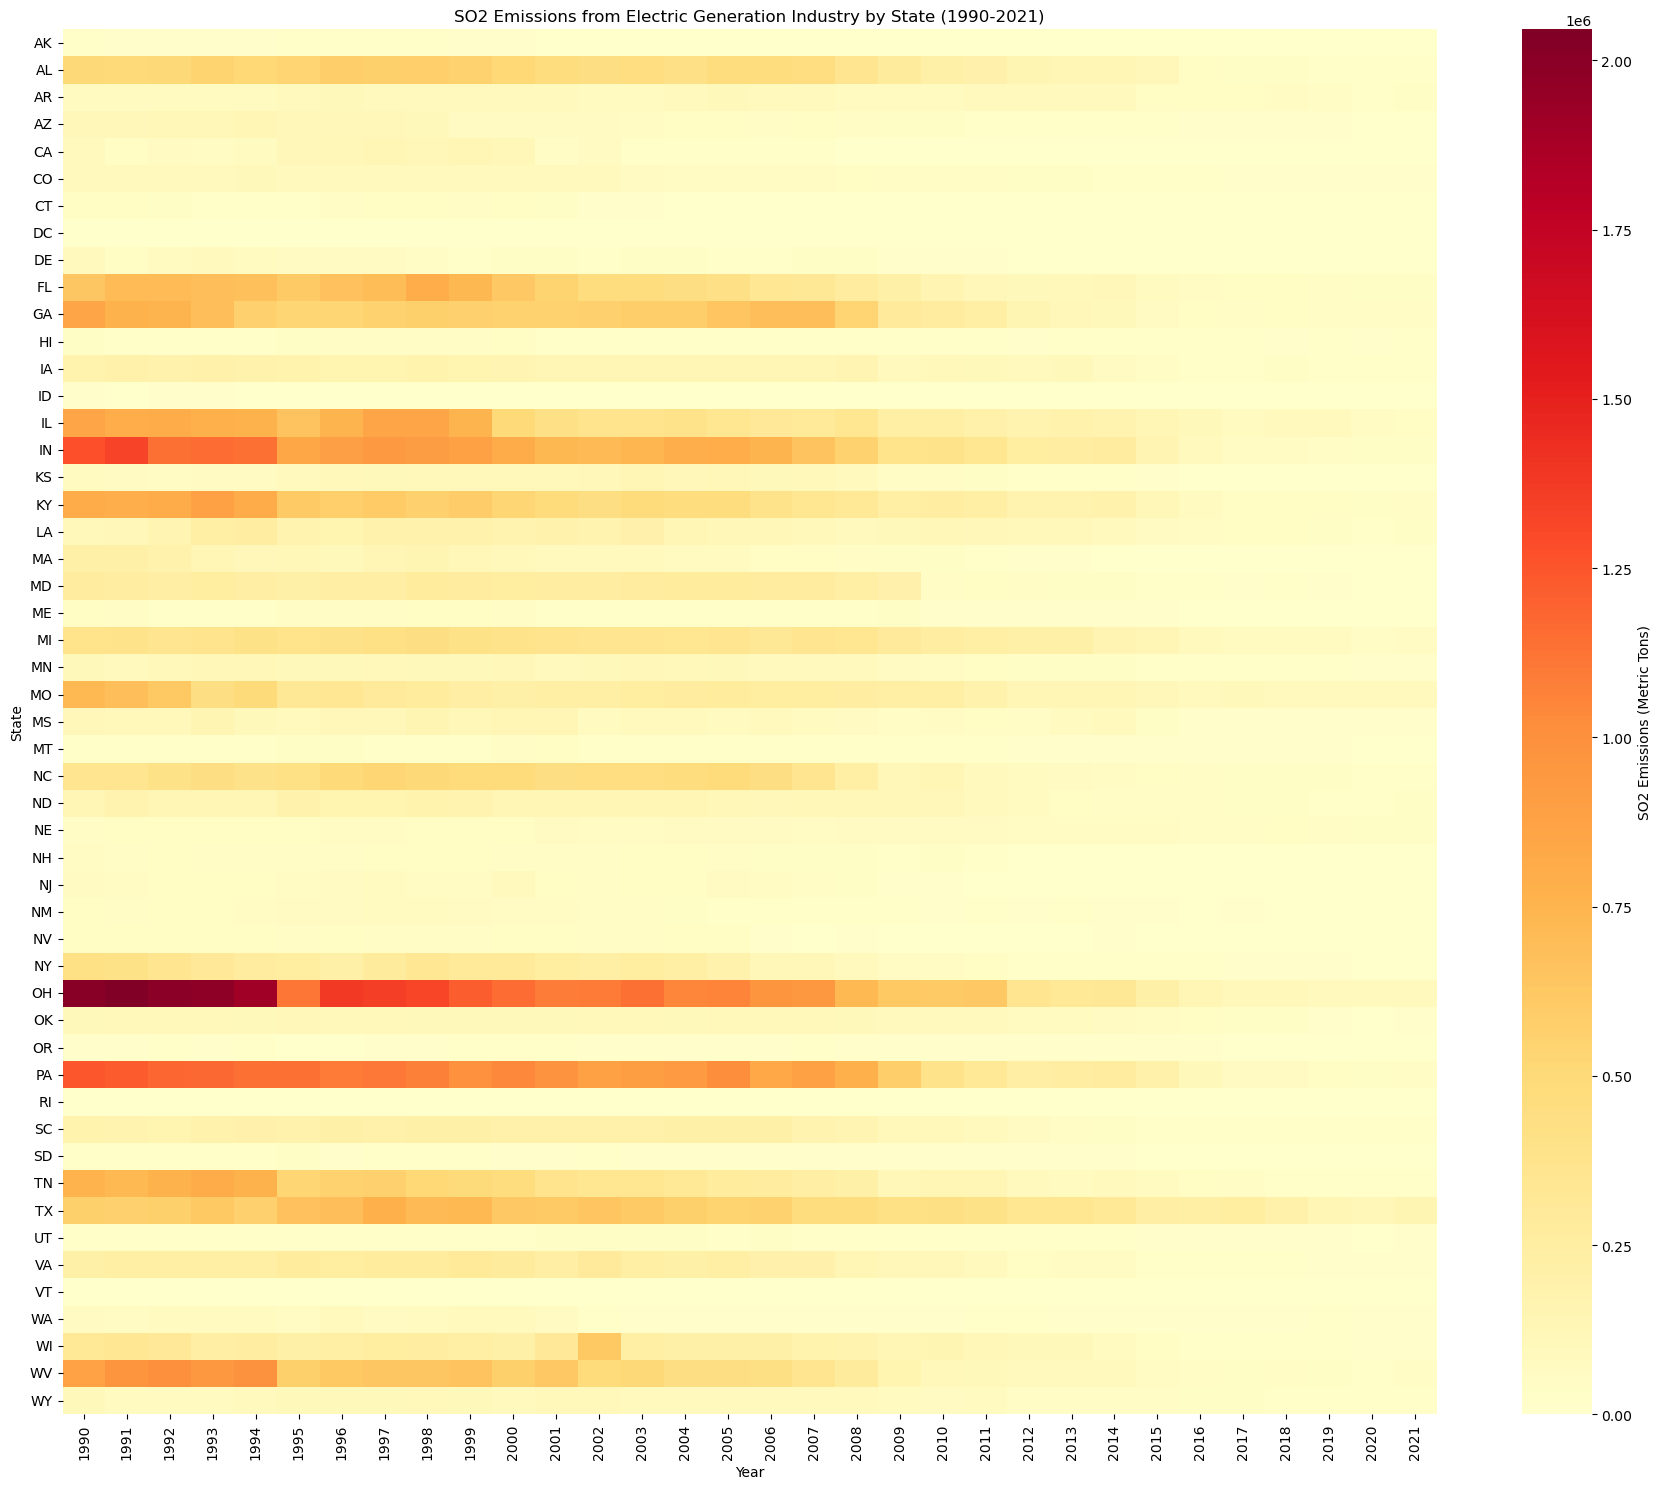

In [66]:
# Pivot data for heatmap
so2_heatmap = data.pivot(index="state", columns="year", values="so2")

# Plotting
plt.figure(figsize=(18, 15))
sns.heatmap(so2_heatmap, cmap="YlOrRd", cbar_kws={'label': 'SO2 Emissions (Metric Tons)'})
plt.title("SO2 Emissions from Electric Generation Industry by State (1990-2021)")
plt.ylabel("State")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


## Visualize NOx Emissions

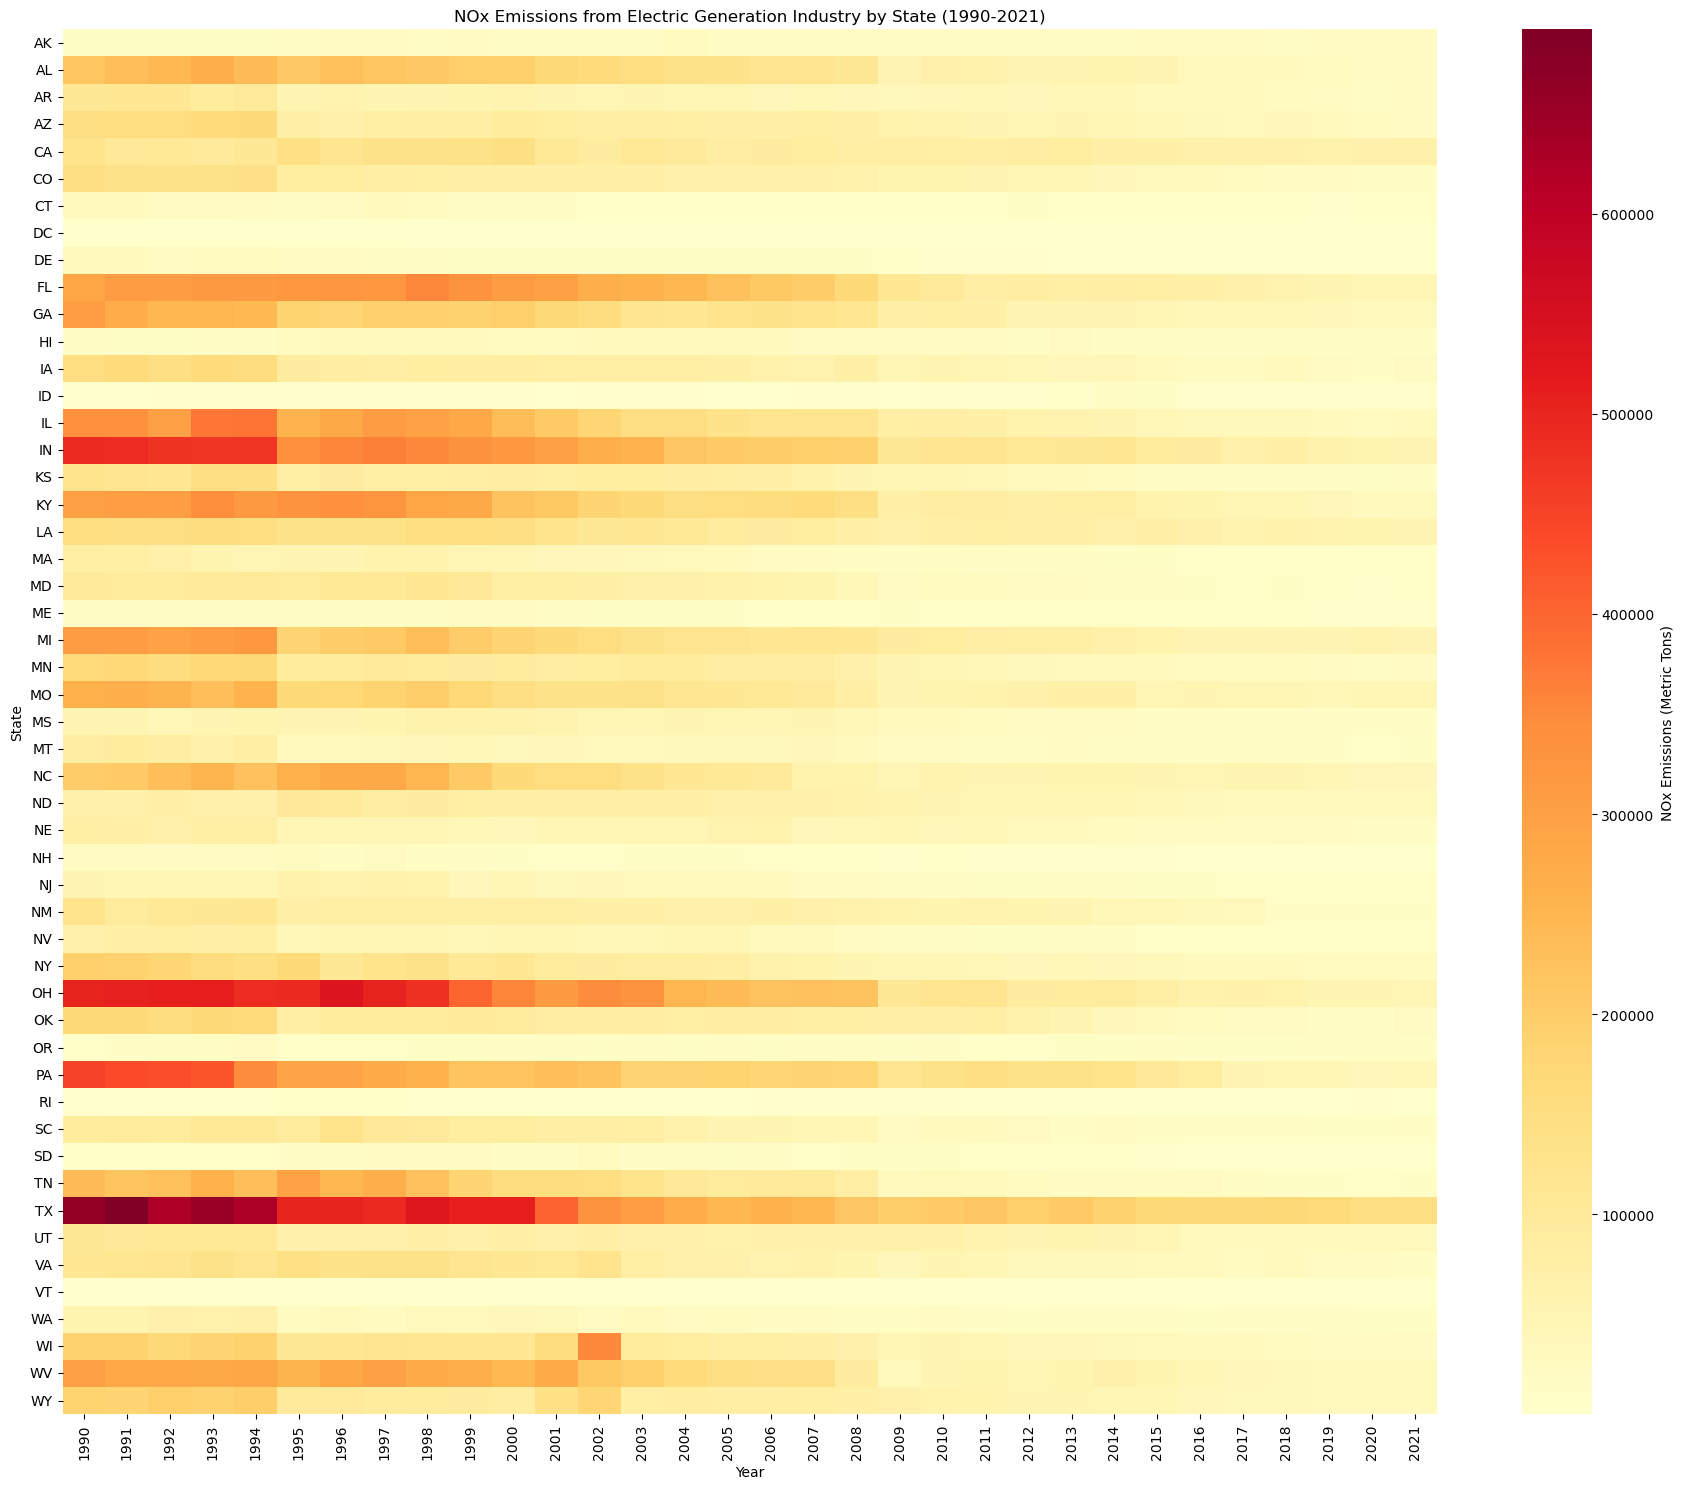

In [67]:
# Pivot data for heatmap
nox_heatmap = data.pivot(index="state", columns="year", values="nox")

# Plotting
plt.figure(figsize=(18, 15))
sns.heatmap(nox_heatmap, cmap="YlOrRd", cbar_kws={'label': 'NOx Emissions (Metric Tons)'})
plt.title("NOx Emissions from Electric Generation Industry by State (1990-2021)")
plt.ylabel("State")
plt.xlabel("Year")
plt.tight_layout()
plt.show()
